# Bank Deposit Prediction Using Supervised Learning

## Importing Required Libraries

In [44]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
#-----------------------------------------------------------------------------------------------------------
#Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
from imblearn.under_sampling import RandomUnderSampler

## Data Loading

In [2]:
#Load data and read first few rows and display data types
df = pd.read_csv("Bank Dataset.csv")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Display data types of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Clean-up

### Check for Missing Values

In [4]:
# Check for Missing Values
missing_values = df.isnull()
missing_count = missing_values.sum()
print(missing_count)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Check for Null Values

In [5]:
# Check for any null values
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Check for Duplicates and Drop Duplicates

In [6]:
# Also check for Duplicates
df.duplicated().sum()

12

In [7]:
#Drop duplicates
df.drop_duplicates(inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#Check for duplicates again to reaffirm 
df.duplicated().sum()

0

### Identify Outliers through Box Plots

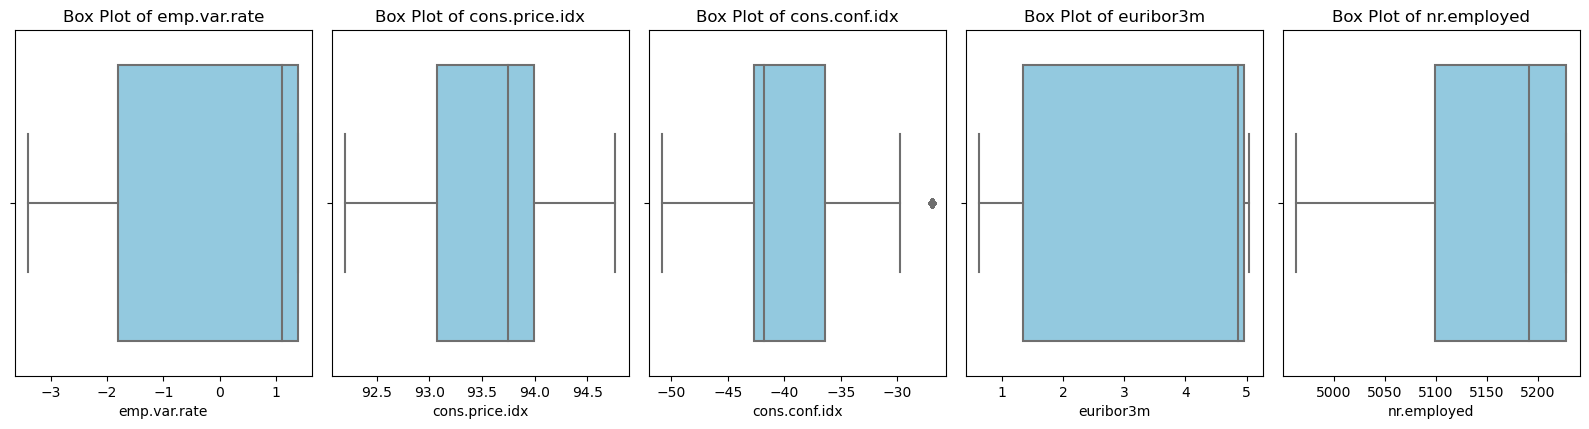

In [9]:
#Display Box Plots
boxplot_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(boxplot_features, 1):
    plt.subplot(2, 5, i)  
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

## Data Transformations

In [10]:
#Checking whether data equally splitted based on target 
level_counts = df['y'].value_counts()
print(level_counts)

no     36537
yes     4639
Name: y, dtype: int64


Replace Target Attribute Values as Integer Values 

In [11]:
#Replace target attribute data with integer values
df = df.replace({'y': {'no':0, 'yes':1}})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
#Replace Strings with Integers for other columns
df = df.replace({'job': {'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6, 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11, 'unknown':12}})
df = df.replace({'marital': {'single':0, 'married':1, 'divorced':3, 'unknown':4}})
df = df.replace({'education': {'basic.4y':0, 'basic.6y':1, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7, 'unknown':8}})
df = df.replace({'default': {'no':0, 'yes':1, 'unknown':3}})
df = df.replace({'housing': {'no':0, 'yes':1, 'unknown':3}})
df = df.replace({'loan': {'no':0, 'yes':1, 'unknown':3}})
df = df.replace({'contact': {'telephone':0, 'cellular':1}})
df = df.replace({'month': {'jan':1, 'feb':1, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}})
df = df.replace({'day_of_week': {'mon':1, 'tue':1, 'wed':3, 'thu':4, 'fri':5}})
df = df.replace({'poutcome': {'failure':0, 'success':1, 'nonexistent':2}})

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,1,0,0,0,0,0,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,4,3,0,0,0,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,4,0,1,0,0,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,1,0,0,0,0,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,4,0,0,1,0,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
#Checking the Job column integer replacements
column_data = df['job'].tolist()
print(column_data)

[4, 8, 8, 1, 8, 8, 1, 2, 10, 8, 2, 8, 2, 4, 2, 6, 2, 2, 2, 5, 11, 2, 6, 10, 1, 10, 10, 7, 10, 12, 1, 10, 2, 5, 2, 12, 8, 10, 1, 10, 5, 3, 1, 1, 1, 10, 1, 2, 1, 2, 1, 4, 1, 1, 2, 10, 5, 8, 11, 10, 3, 2, 2, 2, 1, 1, 2, 1, 1, 2, 5, 5, 1, 12, 1, 2, 10, 8, 5, 2, 2, 2, 1, 3, 10, 1, 5, 1, 10, 1, 1, 12, 1, 11, 2, 8, 5, 1, 10, 2, 8, 2, 8, 1, 1, 8, 4, 1, 3, 10, 6, 11, 8, 2, 5, 2, 1, 2, 1, 2, 2, 2, 8, 10, 1, 1, 1, 10, 6, 10, 2, 10, 2, 2, 5, 5, 4, 2, 8, 2, 11, 5, 5, 2, 12, 2, 2, 1, 1, 2, 2, 3, 8, 3, 2, 2, 2, 2, 10, 8, 5, 2, 2, 2, 8, 3, 8, 1, 2, 5, 2, 8, 10, 1, 8, 5, 8, 1, 8, 2, 10, 2, 2, 1, 2, 5, 10, 6, 2, 1, 10, 2, 5, 10, 2, 2, 1, 2, 1, 2, 8, 8, 2, 1, 2, 9, 9, 11, 8, 9, 9, 4, 1, 6, 2, 4, 2, 2, 4, 8, 1, 10, 8, 10, 10, 6, 10, 1, 6, 2, 1, 8, 5, 1, 7, 1, 2, 1, 8, 5, 6, 10, 5, 8, 10, 8, 10, 10, 2, 8, 10, 2, 8, 10, 8, 8, 2, 5, 10, 1, 1, 2, 10, 1, 1, 2, 7, 9, 5, 7, 11, 5, 4, 1, 4, 2, 8, 2, 10, 6, 2, 10, 1, 2, 2, 2, 4, 1, 2, 8, 5, 1, 10, 2, 10, 7, 2, 1, 8, 12, 8, 2, 6, 12, 1, 1, 2, 4, 1, 2, 5, 1, 1, 2, 5

In [14]:
#Data Scaling
scaler = MinMaxScaler()
scaling_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[scaling_features] = scaler.fit_transform(df[scaling_features])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,4,1,0,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,8,1,4,3,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,8,1,4,0,1,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,1,1,1,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,8,1,4,0,0,1,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0


## Data Visualizations

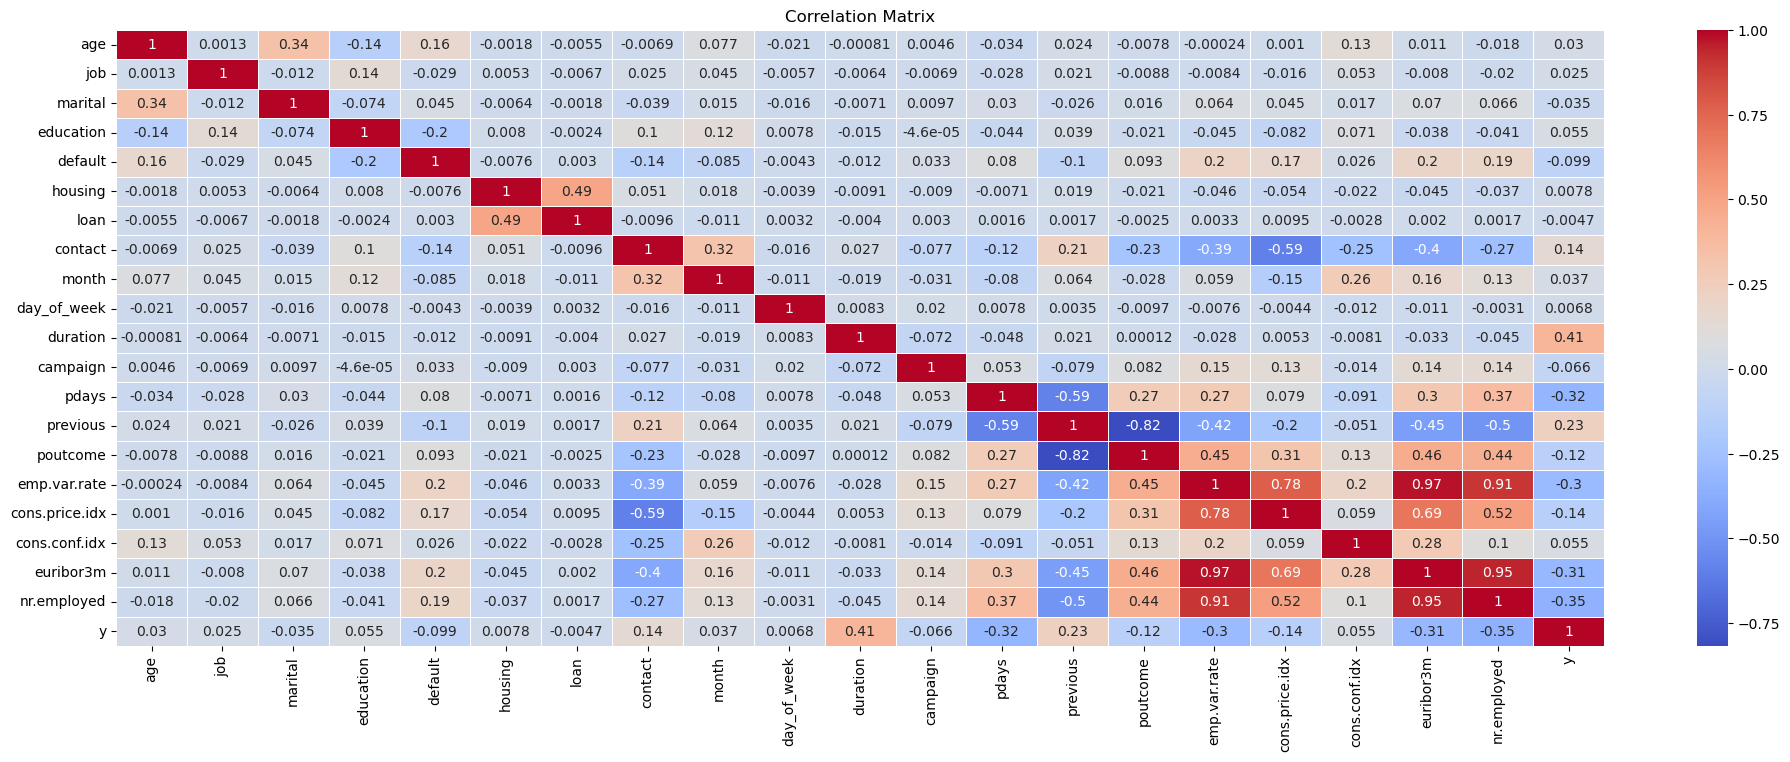

In [15]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

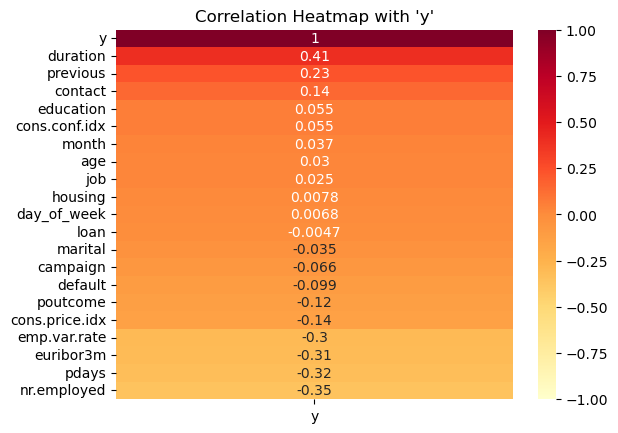

In [16]:
# Check for correlations between Level and other attributes
correlation_heapmap = df.corr()
sns.heatmap(correlation_heapmap [['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
plt.title("Correlation Heatmap with 'y'")
plt.show()

## Data Splitting

In [17]:
# Initiate model
Y = df["y"]
X = df.drop('y', axis=1)

In [18]:
#--Test using under sampler--
# #Train/Test Data Split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Instantiate the RandomUnderSampler
# undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# # Fit and transform the training data
# X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

# print(f"Training set size: {X_train_resampled.shape[0]} samples")
# print(f"Test set size: {X_test.shape[0]} samples")

In [19]:
#Train/Test Data Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 32940 samples
Test set size: 8236 samples


# Model Development and Testing 

### Logistic Regression (LR)

In [52]:
#Building the LR Model
LogisticReg = LogisticRegression(C=1, max_iter=10000, penalty='l2', solver='saga')
LogisticRegModel= LogisticReg.fit(X_train, Y_train)
LogisticRegPredictTrain = LogisticRegModel.predict(X_train)
LogisticRegPredictTest=LogisticRegModel.predict(X_test)

#Calculating the Accuracy
train_accuracyLR = accuracy_score(Y_train, LogisticRegPredictTrain)*100
print("Training Accuracy:", f"{train_accuracyLR:.2f}%")
test_accuracyLR = accuracy_score(Y_test, LogisticRegPredictTest)*100
print("Test Accuracy:", f"{test_accuracyLR:.2f}%")

Training Accuracy: 90.98%
Test Accuracy: 91.33%


##### Check the Accuracy of Logis Regression Model

In [21]:
# Classification Reports -  Logistic Regression Model 
print("Classification Report - Train")
print(classification_report(Y_train,LogisticRegPredictTrain))
print("")
print("Classification Report - Test")
print(classification_report(Y_test,LogisticRegPredictTest))

Classification Report - Train
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29272
           1       0.69      0.39      0.49      3668

    accuracy                           0.91     32940
   macro avg       0.81      0.68      0.72     32940
weighted avg       0.90      0.91      0.90     32940


Classification Report - Test
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7265
           1       0.66      0.35      0.46       971

    accuracy                           0.90      8236
   macro avg       0.79      0.66      0.70      8236
weighted avg       0.89      0.90      0.89      8236



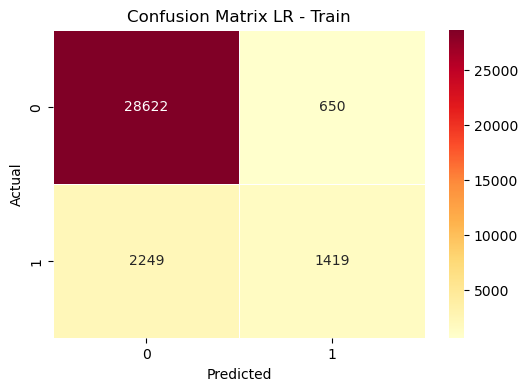

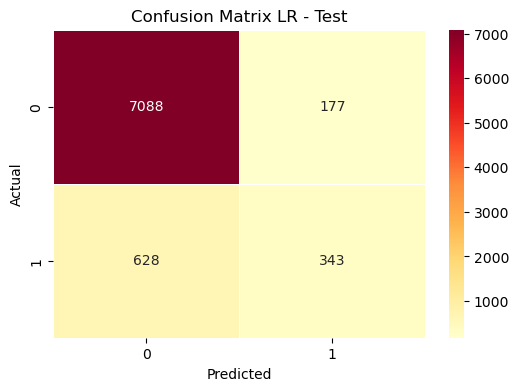

In [22]:
def plot_confusion_matrix(y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix LR - {set_name}')
    plt.show()

# Display confusion matrices for train and test sets
plot_confusion_matrix(Y_train, LogisticRegPredictTrain, 'Train')
plot_confusion_matrix(Y_test, LogisticRegPredictTest, 'Test')

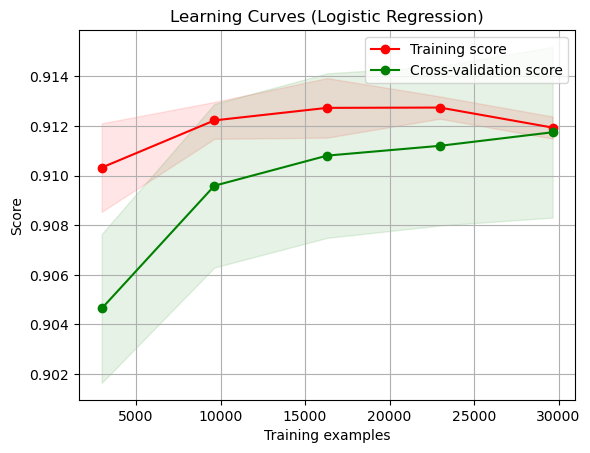

In [23]:
#Logistic Regression Lerning Curve
def plot_learning_curves(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (Logistic Regression)"
cv = 10  # Number of cross-validation folds
plot_learning_curves(LogisticRegModel, title, X_train, Y_train, cv=cv)
plt.show()

### K-Fold Cross-Validation of Logistic Regression

In [24]:
SplitCont = 7
KFold = StratifiedKFold(n_splits=SplitCont, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in KFold.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the LR model on Training Data
    Kmodel = LogisticRegression(C=1.5, max_iter=10000, penalty='l2')
    Kmodel.fit(X_train, Y_train)

    # Test Prediction 
    Y_pred = Kmodel.predict(X_test)
  

    # Evaluate the model and store the metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate the mean and standard deviation of metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

# Display the cross-validated results
print(f"Cross-Validated Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Cross-Validated Precision: {mean_precision:.2f}")
print(f"Cross-Validated Recall: {mean_recall:.2f}")
print(f"Cross-Validated F1 Score: {mean_f1:.2f}")

Cross-Validated Accuracy: 0.91 ± 0.00
Cross-Validated Precision: 0.67
Cross-Validated Recall: 0.39
Cross-Validated F1 Score: 0.49


### Logistic Regression with PCA

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

componentscount = 10
pca = PCA(n_components=componentscount)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [26]:
LogisticRegPCA = LogisticRegression(C=1.5, max_iter=10000, penalty='l2')
LogisticRegPCAModel = LogisticRegPCA.fit(X_train_pca, Y_train)
LogisticRegPCAModelTest = LogisticRegPCA.fit(X_test_pca, Y_test)

#Predict on the training set
y_train_pred_pca = LogisticRegPCAModel.predict(X_train_pca)
# Predict on the test set
y_test_pred_pca = LogisticRegPCAModelTest.predict(X_test_pca)

In [27]:
train_accuracy_LRpca = (accuracy_score(Y_train, y_train_pred_pca))*100
print(f"Train Accuracy LR with PCA: {train_accuracy_LRpca:.2f}")
test_accuracy_LRpca = (accuracy_score(Y_test, y_test_pred_pca))*100
print(f"Test Accuracy LR with PCA: {test_accuracy_LRpca:.2f}")

Train Accuracy LR with PCA: 90.67
Test Accuracy LR with PCA: 90.72


In [28]:
# Classification Reports -  Logistic Regression Model 
print("Classification Report LR with PCA - Train")
print(classification_report(Y_train, y_train_pred_pca))
print("")
print("Classification Report LR with PCA - Test")
print(classification_report(Y_test,y_test_pred_pca))

Classification Report LR with PCA - Train
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31318
           1       0.66      0.35      0.46      3976

    accuracy                           0.91     35294
   macro avg       0.79      0.66      0.70     35294
weighted avg       0.89      0.91      0.89     35294


Classification Report LR with PCA - Test
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5219
           1       0.66      0.36      0.47       663

    accuracy                           0.91      5882
   macro avg       0.79      0.67      0.71      5882
weighted avg       0.89      0.91      0.89      5882



### Support Vector Machine (SVM)

In [29]:
#Support Vector Machine Model Development
SVectorMM = SVC(kernel='linear', C=4, gamma=5)
SVMModel = SVectorMM.fit(X_train, Y_train)
# Make predictions 
SVModelTrain = SVMModel.predict(X_train)
SVModelTest = SVMModel.predict(X_test)

In [30]:
train_accuracySVM = (accuracy_score(Y_train, SVModelTrain))*100
print(f"Training Accuracy: {train_accuracySVM:.2f}")
test_accuracySVM = (accuracy_score(Y_test, SVModelTest))*100
print(f"Test Accuracy: {test_accuracySVM:.2f}")

Training Accuracy: 90.10
Test Accuracy: 90.28


##### Check the Accuracy of SVM

In [31]:
# Classification Report of SVM
print("Classification Report SVM Training")
print(classification_report(Y_train, SVModelTrain, zero_division=0))

Classification Report SVM Training
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     31318
           1       0.64      0.28      0.39      3976

    accuracy                           0.90     35294
   macro avg       0.78      0.63      0.67     35294
weighted avg       0.88      0.90      0.88     35294



In [32]:
print("Classification Report SVM Testing")
print(classification_report(Y_test,SVModelTest, zero_division=0))

Classification Report SVM Testing
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5219
           1       0.66      0.29      0.40       663

    accuracy                           0.90      5882
   macro avg       0.79      0.63      0.67      5882
weighted avg       0.89      0.90      0.89      5882



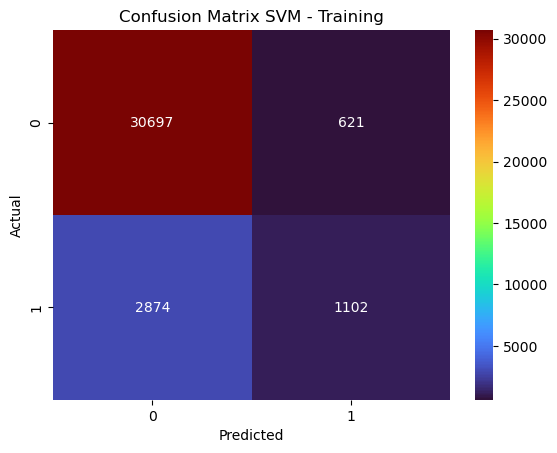

In [33]:
#Confusion Matrix of Actual and Predicted Values - SVM
confusion_matrixSVM = confusion_matrix(Y_train, SVModelTrain)
sns.heatmap(confusion_matrixSVM , annot=True, fmt='d', cmap='turbo')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM - Training')
plt.show()

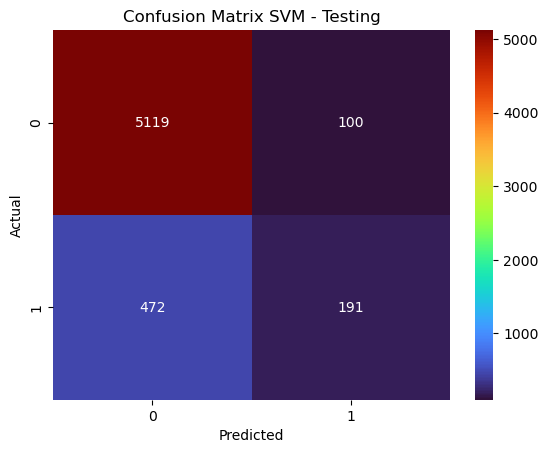

In [34]:
#Confusion Matrix of Actual and Predicted Values - SVM
confusion_matrixSVM = confusion_matrix(Y_test,SVModelTest)
sns.heatmap(confusion_matrixSVM , annot=True, fmt='d', cmap='turbo')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM - Testing')
plt.show()

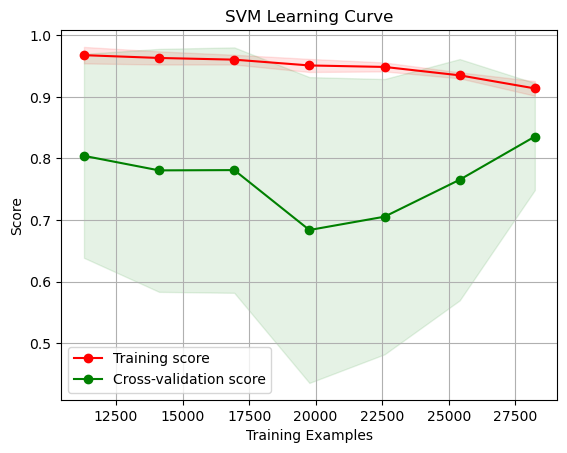

In [37]:
#Learning Curve of SVM Model
train_sizes, train_scores, test_scores = learning_curve(
    SVMModel, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Calculate the mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create a line plot to visualize the training and cross-validation scores
plt.figure()
plt.title("SVM Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### SVM with PCA

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_components = 10
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
SVectorMMPCA = SVC(kernel='linear', C=4, gamma=5)
SVMModelPCA = SVectorMMPCA.fit(X_train_pca, Y_train)
#Test Predictions 
SVPredictPCATest=SVMModelPCA.predict(X_test_pca)
#Train Predictions
SVPredictPCATrain=SVMModelPCA.predict(X_train_pca)

In [40]:
accuracySVMPCATrain = (accuracy_score(Y_train,SVPredictPCATrain))*100
print(f"Train Accuracy: {accuracySVMPCATrain:.2f}%")
accuracySVMPCATest = (accuracy_score(Y_test,SVPredictPCATest))*100
print(f"Test Accuracy: {accuracySVMPCATest:.2f}%")

Train Accuracy: 90.40%
Test Accuracy: 90.46%


In [41]:
print("Classification Report SVM with PCA Testing")
print(classification_report(Y_test,SVPredictPCATest, zero_division=0))

Classification Report SVM with PCA Testing
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5219
           1       0.68      0.29      0.41       663

    accuracy                           0.90      5882
   macro avg       0.80      0.64      0.68      5882
weighted avg       0.89      0.90      0.89      5882



## Comparison of the Models

### Compasion of Accuracy

In [42]:
accuracy_data = [
    ['Logistic Regression - Test Accuracy', f'{test_accuracyLR:.2f}%'],
    ['Logistic Regression (PCA)- Test Accuracy', f'{test_accuracy_LRpca:.2f}%'],
    ['Support Vector Machine- Test Accuracy', f'{test_accuracySVM:.2f}%'],
    ['Support Vector Machine (PCA)- Test Accuracy', f'{accuracySVMPCATest:.2f}%']
]
table = tabulate(accuracy_data, headers=['Model', 'Accuracy%'], tablefmt='pretty')
print(table)

+---------------------------------------------+-----------+
|                    Model                    | Accuracy% |
+---------------------------------------------+-----------+
|     Logistic Regression - Test Accuracy     |  90.23%   |
|  Logistic Regression (PCA)- Test Accuracy   |  90.72%   |
|    Support Vector Machine- Test Accuracy    |  90.28%   |
| Support Vector Machine (PCA)- Test Accuracy |  90.46%   |
+---------------------------------------------+-----------+


### ROC Curve Performance

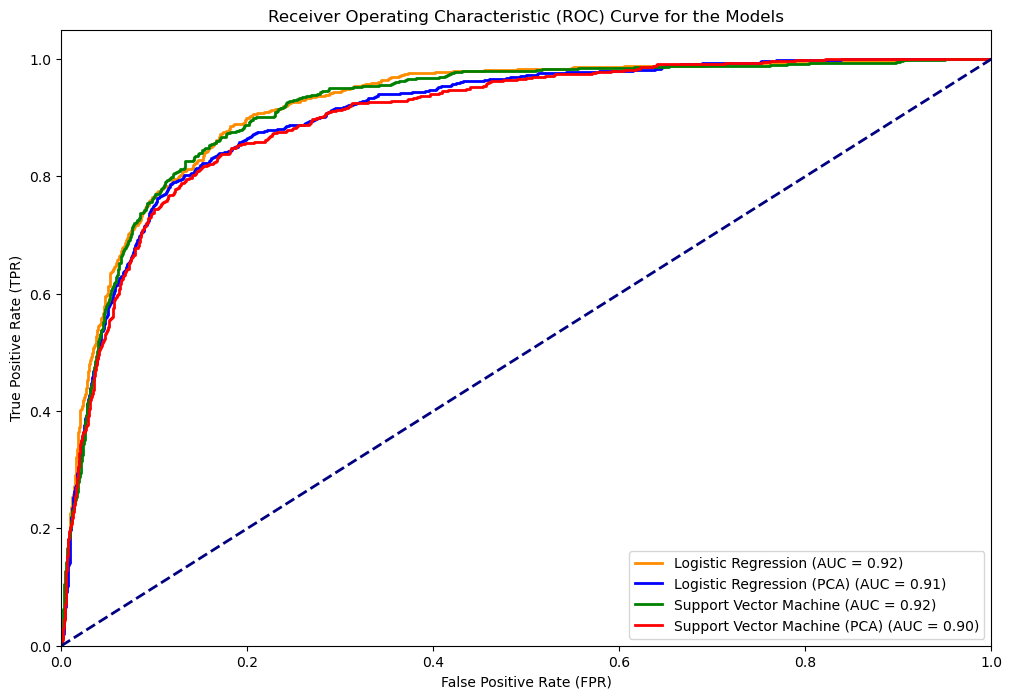

In [43]:
# Logistic Regression
probs_LR = LogisticRegModel.predict_proba(X_test)[:, 1] 
# Logistic Regression with PCA
probs_LR_PCA = LogisticRegPCAModel.predict_proba(X_test_pca)[:, 1] 
# Support Vector Machine
probs_SVM = SVMModel.decision_function(X_test)  
# Support Vector Machine with PCA
probs_SVM_PCA = SVMModelPCA.decision_function(X_test_pca) 

# Calculate ROC curves for each model
fpr_LR, tpr_LR, thresholds_LR = roc_curve(Y_test, probs_LR)
fpr_LR_PCA, tpr_LR_PCA, thresholds_LR_PCA = roc_curve(Y_test, probs_LR_PCA)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(Y_test, probs_SVM)
fpr_SVM_PCA, tpr_SVM_PCA, thresholds_SVM_PCA = roc_curve(Y_test, probs_SVM_PCA)

# Calculate the AUC for each model
roc_auc_LR = auc(fpr_LR, tpr_LR)
roc_auc_LR_PCA = auc(fpr_LR_PCA, tpr_LR_PCA)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
roc_auc_SVM_PCA = auc(fpr_SVM_PCA, tpr_SVM_PCA)

# Create subplots for ROC curves of all models
plt.figure(figsize=(12, 8))
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_LR:.2f})')
plt.plot(fpr_LR_PCA, tpr_LR_PCA, color='blue', lw=2, label=f'Logistic Regression (PCA) (AUC = {roc_auc_LR_PCA:.2f})')
plt.plot(fpr_SVM, tpr_SVM, color='green', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_SVM:.2f})')
plt.plot(fpr_SVM_PCA, tpr_SVM_PCA, color='red', lw=2, label=f'Support Vector Machine (PCA) (AUC = {roc_auc_SVM_PCA:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Models')
plt.legend(loc="lower right")
plt.show()

In [54]:
TN = confusion_matrixSVM[0, 0]
FP = confusion_matrixSVM[0, 1]
FN = confusion_matrixSVM[1, 0]
TP = confusion_matrixSVM[1, 1]
mcc = matthews_corrcoef(Y_test, LogisticRegPredictTest)
print(f"Matthews Correlation Coefficient (MCC) of LRA = {mcc:.2f}")
mcc = matthews_corrcoef(Y_test, y_test_pred_pca)
print(f"Matthews Correlation Coefficient (MCC) of LR with PCA = {mcc:.2f}")
mcc = matthews_corrcoef(Y_test, SVModelTest)
print(f"Matthews Correlation Coefficient (MCC) of SVM = {mcc:.2f}")

confusion_matrixSVM = confusion_matrix(Y_test, SVPredictPCATest)
mcc = matthews_corrcoef(Y_test, SVPredictPCATest)
print(f"Matthews Correlation Coefficient (MCC) of SVM with PCA = {mcc:.2f}")
confusion_matrixSVM = confusion_matrix(Y_test, SVPredictPCATest)


Matthews Correlation Coefficient (MCC) of LRA = 0.49
Matthews Correlation Coefficient (MCC) of LR with PCA = 0.44
Matthews Correlation Coefficient (MCC) of SVM = 0.39
Matthews Correlation Coefficient (MCC) of SVM with PCA = 0.40
